# Regression Model for Salary Prediction
   ------------------------------------------------------------------

The problem statement is to build a machine learning model which will help the company *TechWorks Consulting* in determining the salary of it's newly hired employees.

The job market is becoming very competitive and with the layoffs and unemployment rate increasing, employees have to face a lot of difficulties in getting jobs and are not paid according to their performance. This issue can be tackled with Machine Learning as we can use suitable models to get a holistic approach to this problem. The salaries of the employees can be predicted based on various factors such as their experience level, qualifications, graduation scores, performance evaluations etc to ensure that compensation is consistent and fair across different employees.

In this project, we will use a dataset containing the employees past data. Our task is to build a model that can predict the salary that a newly hired employee would get based on the experience, qualifications, performance and their past salaries. We will apply regression algorithms to be able to make predictions faster and more accurately.
*******************************************************************************************************


We will be doing the following tasks:

**Dataset Overview:**
- Read the dataset
- Change values of categorical columns according to data from corresponding files

**Data Preprocessing:**
- Understand the basic information, summary statistics for numerical and categorical variables.
- Check for missing values.
- Check for outliers
- Convert categorical variables into numerical variables.
- Analyze the distribution of numerical variables against the response variable.
- Perform Correlation analysis to find correlations between predictor variables and response variable

**Train-Test Split:**
- Split the whole dataset into 2 parts, 80% for training the model and 20% for testing

**Model Building:**
- Try different available regression models
- Find the models' Mean Squared Error (MSE) and R2 score values
- Select the model with highest R2 and lowest MSE 

In [150]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

## Dataset Overview
**********************************

In [151]:
#reading data into DataFrame 'df'
df = pd.read_csv('Downloads/ML case Study.csv', header = 0)

In [152]:
#view a sample of the data
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [153]:
#reading Colleges and Cities data
df1 = pd.read_csv('Downloads/Colleges.csv', header = 0)
df2 = pd.read_csv('Downloads/cities.csv', header = 0)

In [154]:
#creating 3 lists of Tiers of colleges
Tier1 = df1["Tier 1"].tolist()
Tier2 = df1["Tier 2"].tolist()
Tier3 = df1["Tier 3"].tolist()

In [155]:
#replacing college names to 1, 2 or 3 according to their tiers
for item in df.College:
    if item in Tier1:
        df["College"].replace(item, 1 ,inplace=True)
    elif item in Tier2:
        df["College"].replace(item, 2 ,inplace=True)
    elif item in Tier3:
        df["College"].replace(item, 3 ,inplace=True)

In [156]:
df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10
5,2,Kolhapur,Executive,54340.0,4,73,31,59950.89
6,3,Surat,Executive,60298.0,1,42,46,66602.34
7,2,Delhi,Executive,49944.0,2,56,37,57768.44
8,3,Chennai,Executive,53124.0,4,40,37,70083.30
9,1,Kolhapur,Executive,51141.0,1,47,60,85648.48


In [157]:
#doing the same thing for Cities as with Colleges
metro_city = df2["Metrio City"].tolist()
non_metro_city = df2["non-metro cities"].tolist()

In [158]:
for item in df.City:
    if item in metro_city:
        df["City"].replace(item, 1 ,inplace=True)
    elif item in non_metro_city:
        df["City"].replace(item, 0 ,inplace=True)

In [159]:
df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10
5,2,0,Executive,54340.0,4,73,31,59950.89
6,3,1,Executive,60298.0,1,42,46,66602.34
7,2,1,Executive,49944.0,2,56,37,57768.44
8,3,1,Executive,53124.0,4,40,37,70083.30
9,1,0,Executive,51141.0,1,47,60,85648.48


In [160]:
#creating dummy variables for the variable 'Role'
#'drop_first=True' creates k-1 dummies and 'dtype=int' changes their type to int from boolean
df = pd.get_dummies(df, columns=['Role'], drop_first=True, dtype = int)

In [161]:
df.head(10)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0
5,2,0,54340.0,4,73,31,59950.89,0
6,3,1,60298.0,1,42,46,66602.34,0
7,2,1,49944.0,2,56,37,57768.44,0
8,3,1,53124.0,4,40,37,70083.30,0
9,1,0,51141.0,1,47,60,85648.48,0


## Data Preprocessing
**********************************

In [162]:
#provides a summary of all the columns, the column counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


*We see that there are no missing values in any column of the dataset.*

In [163]:
#descriptive statistics of numerical variables
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


*The mean and median values are almost equal for values of all columns and the standard deviation is also not too high. The distribution of every column's values, found by min, max and percentile values show no abnormal behavior that can suggest presence of outliers.*

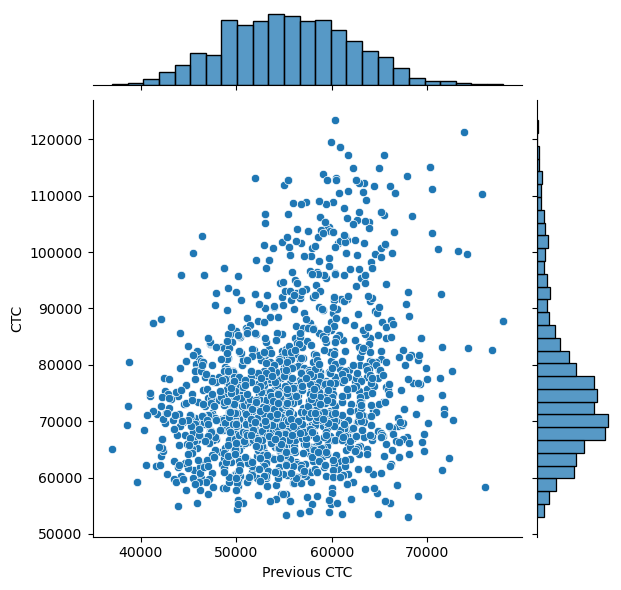

In [164]:
#scatter plots of predictor variables and response variable
sns.jointplot(df, x = df['Previous CTC'], y = df['CTC'])

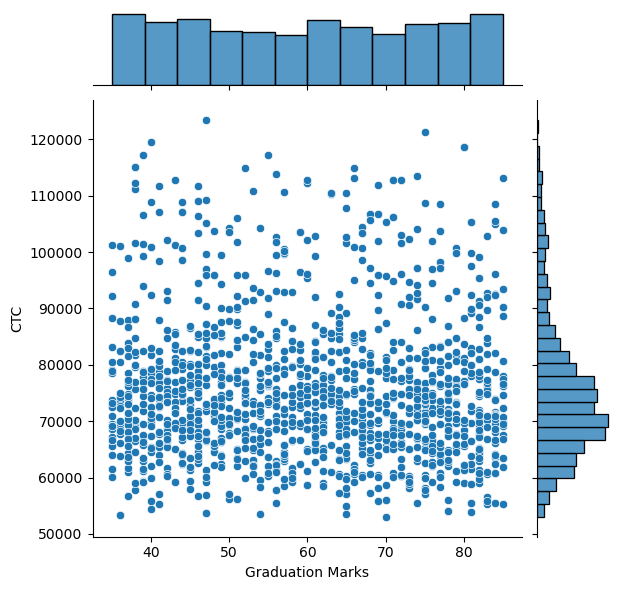

In [165]:
sns.jointplot(df, x = df['Graduation Marks'], y = df['CTC'])

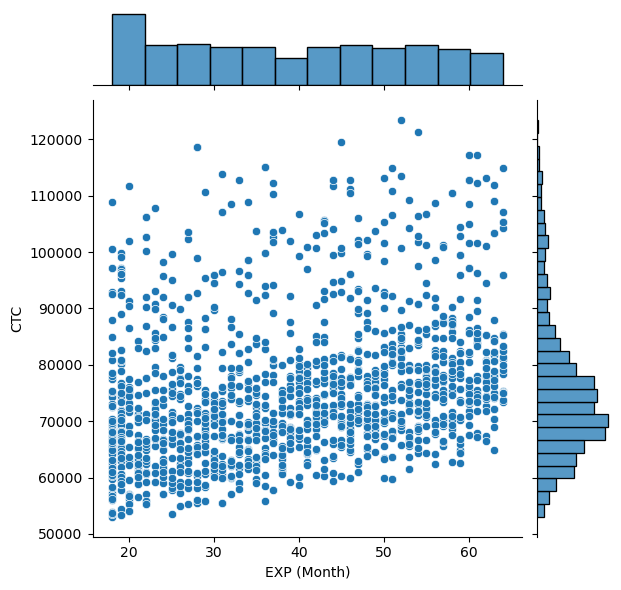

In [166]:
sns.jointplot(df, x = df['EXP (Month)'], y = df['CTC'])

<Axes: xlabel='CTC', ylabel='Count'>

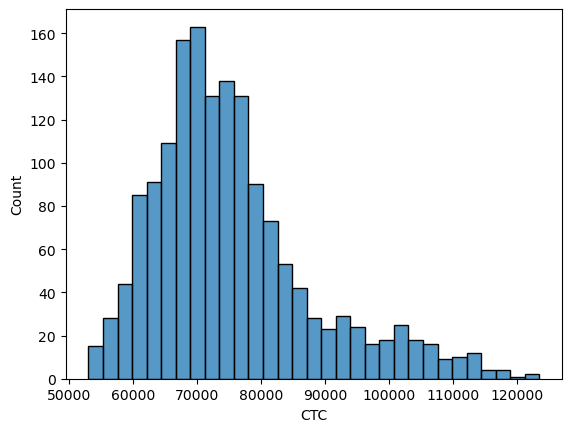

In [167]:
#histogram of response variable
sns.histplot(df.CTC)

*The scatter plots of the above independent variables show no extremities. The plots for `Graduation Marks` and `EXP(Month)` show uniform distribution. Also, the histogram plot of the response variable `CTC` show no data points that are significantly different from other points.*

*Hence, the dataset has no outliers.*

<Axes: xlabel='College', ylabel='count'>

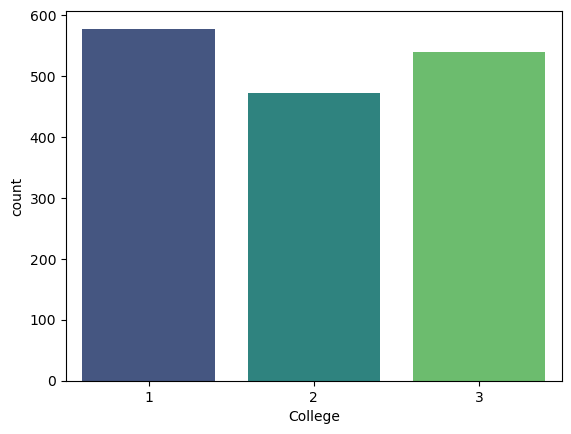

In [168]:
#bar plots of categorical variables
sns.countplot(data = df, x= 'College', palette='viridis')

<Axes: xlabel='City', ylabel='count'>

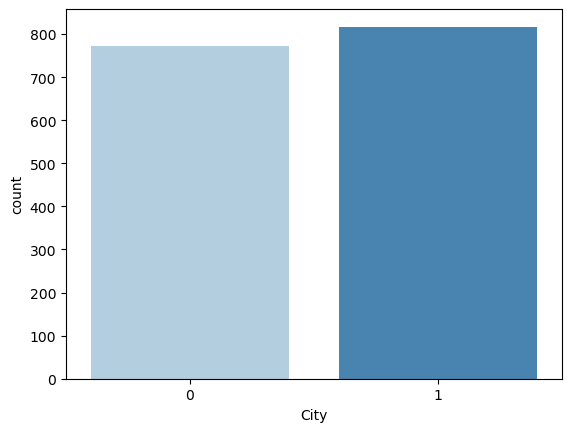

In [169]:
sns.countplot(data = df, x= 'City', palette='Blues')

<Axes: xlabel='Previous job change', ylabel='count'>

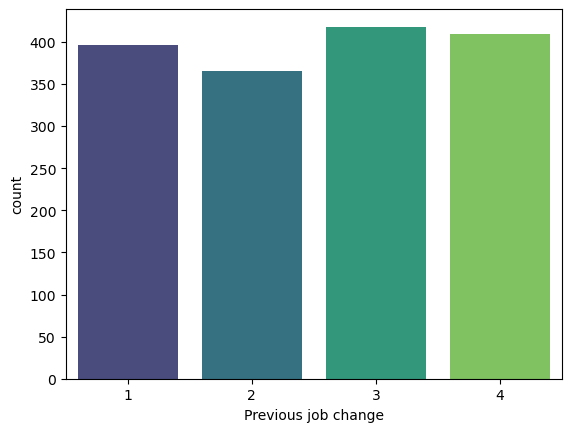

In [170]:
sns.countplot(data = df, x= 'Previous job change', palette='viridis')

<Axes: xlabel='Role_Manager', ylabel='count'>

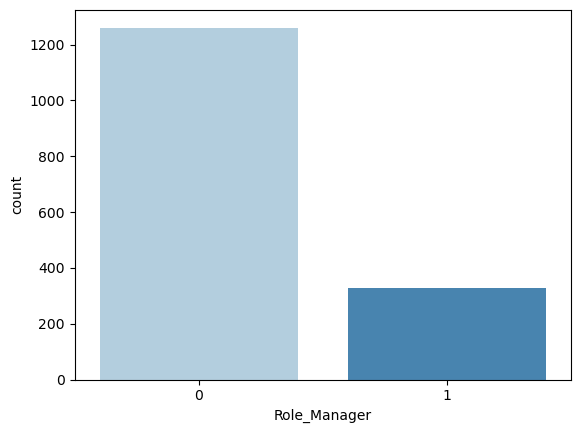

In [171]:
sns.countplot(data = df, x= 'Role_Manager', palette='Blues')

*From the bar plots of the categorical variables, we find that all classes or categories of the above variables are in sufficient numbers. No column has values of only one class.*

<Axes: >

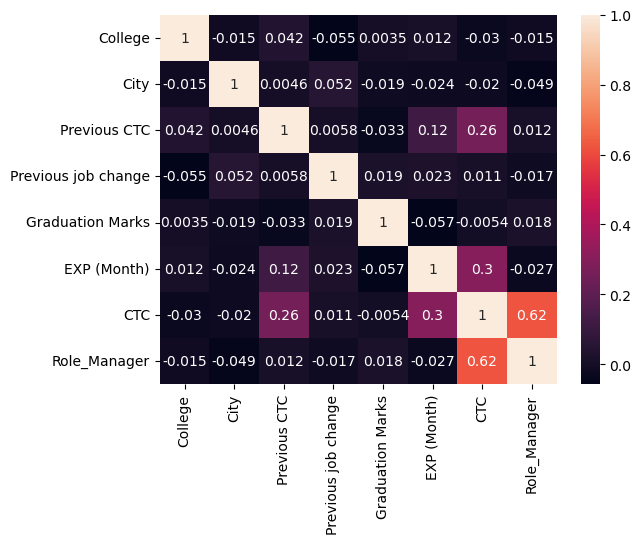

In [172]:
#Correlation matrix heatmap
#represents larger values with lighter colors
sns.heatmap(df.corr(), annot= True)  #annot=True gives values of the squares along with the colors

*From the above heatmap of the correlation matrix, we find that `EXP (Month)`, `Previous CTC` and `Role Manager` have the highest correlation with the dependent variable `CTC`.*

*Also, `Previous CTC` and `EXP (Month)` are correlated more than others, but not significantly.*

## Train-test Split
*******************************

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
#create X and y variables
#1st argument for rows, since we want all rows, put : and 2nd argument for columns & we want all columns except 'CTC'
X = df.loc[:, df.columns != 'CTC']  
y = df['CTC']

In [175]:
X.shape   #original DataFrame had 8 columns, now X contains only predictor variables

(1589, 7)

In [176]:
#define 4 variables- dependent and independent train and test variables
#the train_test_split function returns 4 dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)
#20% data for testing so test_size=0.2 
#random_state=0 to get reproducible results

In [177]:
#check rows and columns count
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


*We see that the `X_train` and `X_test` dataframes contain 80% and 20% of the whole dataset respectively.*

## Model Building
*********************************

The available ML regression models that we can use for this task are:
- Linear Regression
- Ridge Regression
- Lasso Regression
- KNN Regressor
- Regression Tree
- Bagging Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Ada Boost Regressor
- XG Boost Regressor

We will try each one of the above listed models one by one and find their MSE and R2 values to compare them.

### Linear Regression

In [178]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression

In [179]:
#import functions to check R2 value and MSE for test data
from sklearn.metrics import r2_score, mean_squared_error

In [180]:
#creating Linear regression object
lm = LinearRegression()

In [181]:
#fit X and y variables
lm.fit(X_train, y_train)

LinearRegression()

In [182]:
#see intercept and coefficients
#attributes of linear regression object
print(lm.intercept_)

36989.42825479502


In [183]:
 print(lm.coef_)

[-3.96799551e+02  9.32400785e+02  4.28858057e-01  9.82300083e+01
  9.94507467e+00  2.57591989e+02  1.92412378e+04]


In [184]:
mean_squared_error(y_test, lm.predict(X_test))   #true and predicted values of y as arguments

68909870.69952603

In [185]:
r2_score(y_test, lm.predict(X_test))  #true and predicted values of y as arguments

0.5355989894790063

### Ridge Regression

In [186]:
from sklearn import preprocessing   #for standardizing data

In [187]:
from sklearn.linear_model import Ridge

In [188]:
#scaler object that stores the scaling information for X variable
scaler = preprocessing.StandardScaler().fit(X_train)

In [189]:
#transforming X_train and X_test so that it can create scaled variables
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [190]:
lm_r = Ridge(alpha = 0.5)   #lambda(tuning parameter) = 0.5 (called alpha in Python)
lm_r.fit(X_train_s, y_train)   #fitting using scaled X- variable

Ridge(alpha=0.5)

In [191]:
mean_squared_error(y_test, lm_r.predict(X_test_s))

68911963.65250452

In [192]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5355848845406525

In [193]:
#find value of lambda for which R2 is max
#Validation curves are used for trying out such multiple values of hyperparameters
from sklearn.model_selection import validation_curve

In [194]:
param_range = np.logspace(-2,8,100)   #array of lambda values
#creates 100 values between 10^-2 & 10^8

In [195]:
#output of validation_curve() is in form of 2 arrays- train scores and test scores
train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, param_name= "alpha", 
                                             param_range= param_range, cv=3, scoring= 'r2')

#cv- cross-validation generator that determines the cross-validation splitting strategy
#param_name- parameter whose values will be optimized

In [196]:
test_scores

array([[ 5.58225813e-01,  4.77575140e-01,  5.29814611e-01],
       [ 5.58225826e-01,  4.77575213e-01,  5.29814567e-01],
       [ 5.58225843e-01,  4.77575304e-01,  5.29814511e-01],
       [ 5.58225864e-01,  4.77575420e-01,  5.29814440e-01],
       [ 5.58225890e-01,  4.77575565e-01,  5.29814351e-01],
       [ 5.58225924e-01,  4.77575749e-01,  5.29814239e-01],
       [ 5.58225966e-01,  4.77575980e-01,  5.29814096e-01],
       [ 5.58226019e-01,  4.77576272e-01,  5.29813917e-01],
       [ 5.58226086e-01,  4.77576640e-01,  5.29813690e-01],
       [ 5.58226169e-01,  4.77577104e-01,  5.29813404e-01],
       [ 5.58226274e-01,  4.77577690e-01,  5.29813042e-01],
       [ 5.58226406e-01,  4.77578427e-01,  5.29812584e-01],
       [ 5.58226571e-01,  4.77579357e-01,  5.29812004e-01],
       [ 5.58226776e-01,  4.77580527e-01,  5.29811271e-01],
       [ 5.58227031e-01,  4.77582001e-01,  5.29810341e-01],
       [ 5.58227347e-01,  4.77583856e-01,  5.29809162e-01],
       [ 5.58227736e-01,  4.77586187e-01

In [197]:
#getting the mean score of the three values
train_mean = np.mean(train_scores, axis= 1)
test_mean = np.mean(test_scores, axis = 1)

In [198]:
max(test_mean)   #highest R2 value for the model

0.52188150914084

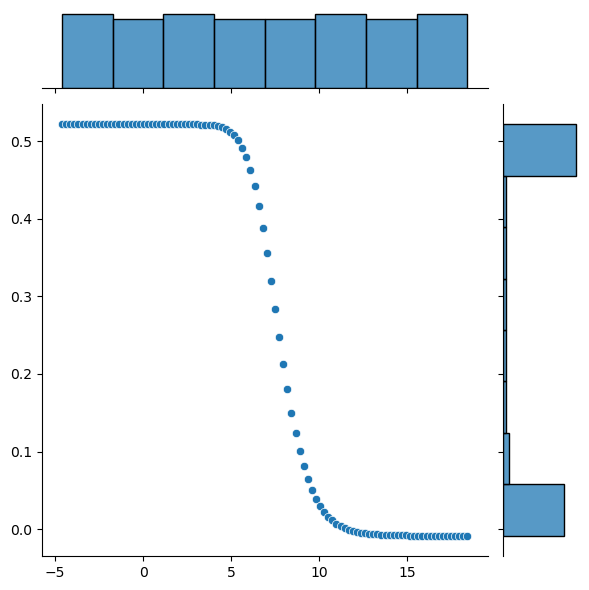

In [199]:
sns.jointplot(x= np.log(param_range), y = test_mean)   #plot of R2 and lambda values

In [200]:
np.where(test_mean == max(test_mean))   #location of the highest value

(array([25], dtype=int64),)

In [201]:
param_range[25]   #lambda value for the 25th index

3.351602650938841

In [202]:
#fitting a Ridge model against this lambda
lm_r_best = Ridge(alpha = param_range[25])
lm_r_best.fit(X_train_s, y_train)

Ridge(alpha=3.351602650938841)

In [203]:
mean_squared_error(y_test, lm_r_best.predict(X_test_s))

68924284.72107969

In [204]:
r2_score(y_test, lm_r_best.predict(X_test_s))

0.5355018497498609

*The R2 scores obtained from ordinary Ridge regression with one lambda value and the Ridge regression with validation curve optimizing values of lambda, are almost same, i.e. `0.535584` and `0.535501` respectively & we will take the highest among them which is `0.535584`.*

### Lasso Regression

In [205]:
#importing Lasso
from sklearn.linear_model import Lasso

In [206]:
lm_l = Lasso(alpha = 0.4)
lm_l.fit(X_train_s, y_train)

Lasso(alpha=0.4)

In [207]:
mean_squared_error(y_test, lm_l.predict(X_test_s))

68909090.27399625

In [208]:
r2_score(y_test, lm_l.predict(X_test_s))

0.5356042489636199

In [209]:
#creating Validation Curve for Lasso regression
train_scores1, test_scores1 = validation_curve(Lasso(), X_train_s, y_train, param_name= "alpha", 
                                               param_range= param_range, cv=3, scoring= 'r2')

In [210]:
train_mean1 = np.mean(train_scores1, axis= 1)
test_mean1 = np.mean(test_scores1, axis= 1)

In [211]:
max(test_mean1)

0.5221172442125029

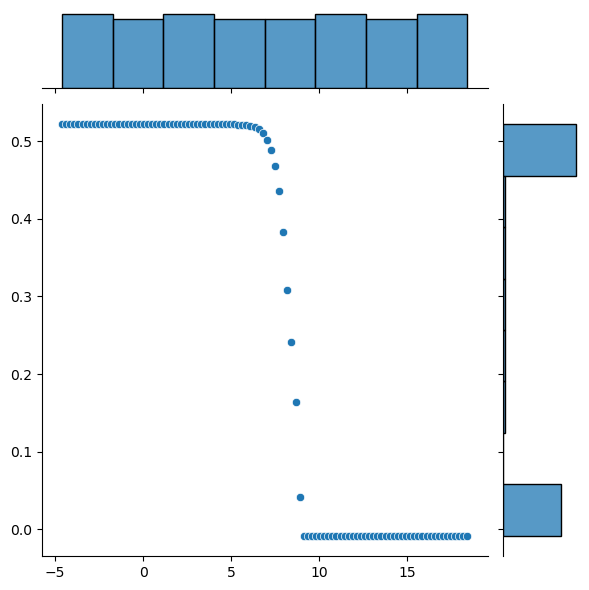

In [212]:
sns.jointplot(x= np.log(param_range), y = test_mean1)

In [213]:
np.where(test_mean1 == max(test_mean1))

(array([38], dtype=int64),)

In [214]:
param_range[38]

68.92612104349695

In [215]:
lm_l_best = Lasso(alpha = param_range[38])

In [216]:
lm_l_best.fit(X_train_s, y_train)

Lasso(alpha=68.92612104349695)

In [217]:
mean_squared_error(y_test, lm_l_best.predict(X_test_s))

68804150.95206282

In [218]:
r2_score(y_test, lm_l_best.predict(X_test_s))

0.5363114615393301

*The R2 score obtained from the Lasso regression with validation curve optimizing values of lambda, i.e. `0.5363`, is higher than the ordinary Lasso regression with one lambda value, which is `0.5356` & we will take the highest among them, `0.5363`.*

### KNN

In [219]:
from sklearn.neighbors import KNeighborsRegressor

In [220]:
reg_knn = KNeighborsRegressor(n_neighbors = 10)   #n_neighbors- parameter 'K' 
reg_knn.fit(X_train_s, y_train)  #using scaled X- variable

KNeighborsRegressor(n_neighbors=10)

In [221]:
mean_squared_error(y_test, reg_knn.predict(X_test_s))

66562356.27254722

In [222]:
r2_score(y_test, reg_knn.predict(X_test_s))

0.5514194816818608

*`Ridge` & `Lasso` regression and `KNN` are not scale invariant like Ordinary Least Squares (OLS) Method, so scaling the variables is required before fitting the model.*

*On the contrary, `Decision Trees` and `Ensemble` methods are scale invariant too, so they don't need scaling i.e. normalization of the variables.*

### Regression Tree

In [223]:
from sklearn import tree

In [224]:
#creating Regression tree object
regtree = tree.DecisionTreeRegressor(max_depth = 4)   #max_depth- maximum depth of the tree

In [225]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [226]:
mean_squared_error(y_test, regtree.predict(X_test))

58875901.69009934

In [227]:
r2_score(y_test, regtree.predict(X_test))

0.603220439065417

In [228]:
#plotting Regression Tree
from IPython.display import Image   

In [229]:
import pydotplus

In [230]:
#create dot file, convert it into image and use that image to create graph of the decision tree
dot_data = tree.export_graphviz(regtree, out_file=None, feature_names= X_train.columns, filled= True)

#if feature_names are mentioned, column names would be there, not X0,X1 etc
#filled=True fills color according to the mean value of the bucket,i.e. performs conditional formatting

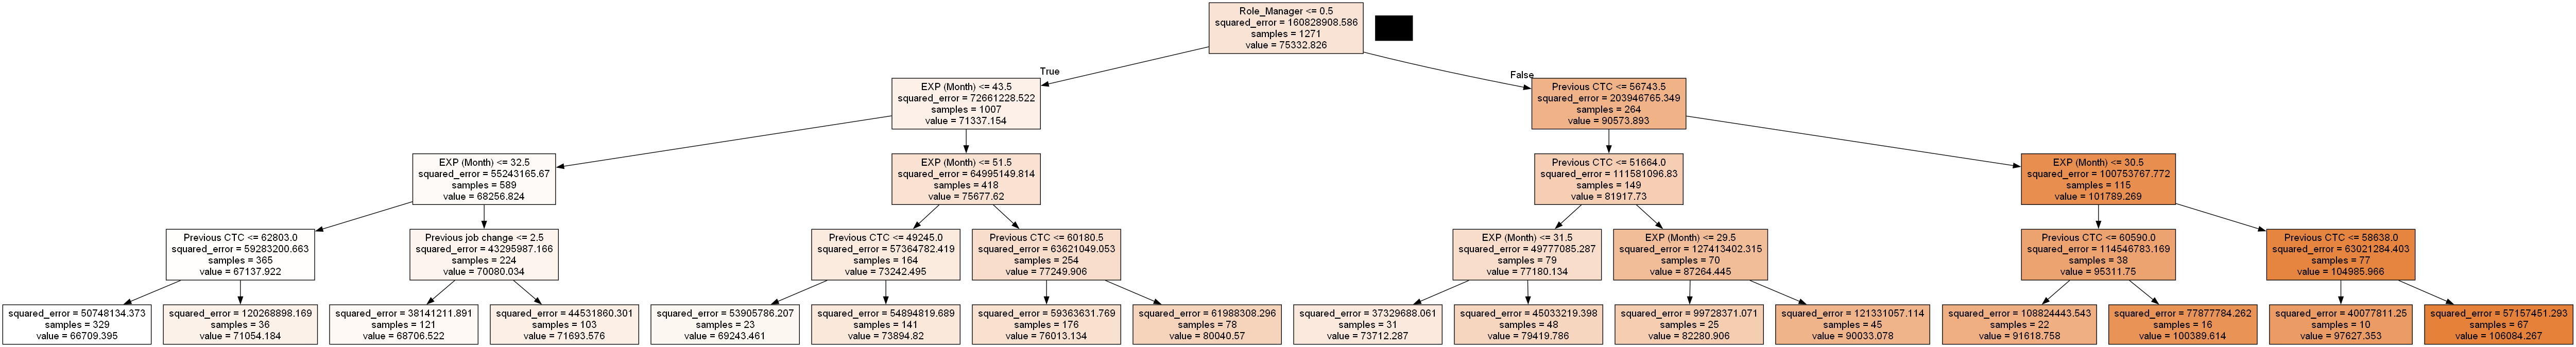

In [231]:
#display graph of the tree
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Bagging

In [232]:
from sklearn.ensemble import BaggingRegressor

In [233]:
bag_reg = BaggingRegressor(estimator= regtree, n_estimators= 5000, 
                            bootstrap= True, n_jobs= -1, 
                            random_state= 0)

#n_estimators- number of base estimators (trees) in ensemble
#n_jobs=-1 uses all the processing power of computer, by default n_jobs=1 i.e. only one processor used
#bootstrap- whether samples are drawn with replacement

In [234]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                 n_estimators=5000, n_jobs=-1, random_state=0)

In [235]:
mean_squared_error(y_test, bag_reg.predict(X_test))

56581275.681483775

In [236]:
r2_score(y_test, bag_reg.predict(X_test))

0.618684502868633

### Random Forest

In [237]:
from sklearn.ensemble import RandomForestRegressor

In [238]:
rf_reg = RandomForestRegressor(n_estimators= 5000, n_jobs= -1, random_state= 0)

In [239]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5000, n_jobs=-1, random_state=0)

In [240]:
mean_squared_error(y_test, rf_reg.predict(X_test))

50170333.82826017

In [241]:
r2_score(y_test, rf_reg.predict(X_test))

0.6618894580485714

In [242]:
#Using GridSearchCV to optimize hyperparameters in Random Forest Regressor
from sklearn.model_selection import GridSearchCV

In [243]:
rf_reg1 = RandomForestRegressor(n_estimators= 300, random_state= 0)

In [244]:
#creating a dictionary of parameter values
params_grid = {'max_features': [4,5,6,7,8,9,10], 
               'min_samples_split': [2,3,10]}

#max_features- number of features to consider when looking for the best split
#min_samples_split- minimum number of samples required to split an internal node

In [245]:
grid_search = GridSearchCV(rf_reg1, params_grid, n_jobs= -1, cv= 3)   #passing the dictionary as parameter

In [246]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=300, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]})

In [247]:
#parameters of the best model
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 2}

In [248]:
#information of the best model to predict values of test data
cvrf_reg1 = grid_search.best_estimator_

In [249]:
mean_squared_error(y_test, cvrf_reg1.predict(X_test))

49770661.16534016

In [250]:
r2_score(y_test, cvrf_reg1.predict(X_test))

0.6645829529957175

*We get R2 value as `0.66188` while using ordinary Random Forest regressor with single parameters but we get R2 value of `0.66458` by passing Random Forest regressor into GridSearchCV as estimator and creating multiple parameter values, which is higher than the former. So we will take the highest among them i.e. `0.66458`.*

### Gradient Boosting

In [251]:
from sklearn.ensemble import GradientBoostingRegressor

In [252]:
gbc_reg = GradientBoostingRegressor(learning_rate= 0.005, n_estimators= 2000, max_depth= 5)
gbc_reg.fit(X_train, y_train)

#learning_rate- shrinks the contribution of each tree by that value (shrinkage parameter)

GradientBoostingRegressor(learning_rate=0.005, max_depth=5, n_estimators=2000)

In [253]:
mean_squared_error(y_test, gbc_reg.predict(X_test))

54021808.90609709

In [254]:
r2_score(y_test, gbc_reg.predict(X_test))

0.6359333954411837

### Ada Boost

In [255]:
from sklearn.ensemble import AdaBoostRegressor

In [256]:
ada_reg = AdaBoostRegressor(learning_rate= 0.005, n_estimators= 1000)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.005, n_estimators=1000)

In [257]:
mean_squared_error(y_test, ada_reg.predict(X_test))

59048872.39873122

In [258]:
r2_score(y_test, ada_reg.predict(X_test))

0.602054745804586

### XG Boost

In [259]:
import xgboost as xgb

In [260]:
xgb_reg = xgb.XGBRegressor(max_depth= 8, n_estimators= 10000, learning_rate= 0.001,
                           n_jobs= -1)

In [261]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [262]:
mean_squared_error(y_test, xgb_reg.predict(X_test))

52723096.93027667

In [263]:
r2_score(y_test, xgb_reg.predict(X_test))

0.6446857432227746

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

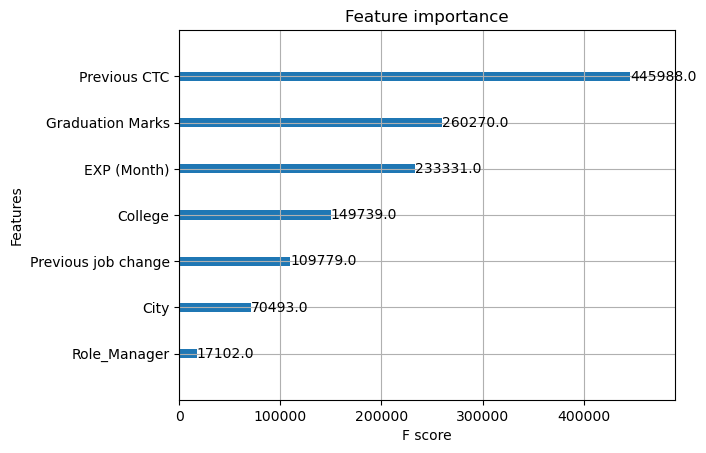

In [264]:
xgb.plot_importance(xgb_reg)
#we can plot a graph of relative importance of all predictor variables used for model

*We can see that `Previous CTC`, followed by `Graduation Marks` and `EXP (Month)` have the maximum impact on the response variable, `CTC`.*

***All the parameters of the above models have been selected so as to get the highest possible R2 score values and least possible MSE values.***
**************************************************

After trying out all the available regression models, we can clearly see that the `Random Forest Regressor` used with GridSearchCV for multiple parameters has the highest R2 score value, `0.66548` among the rest of the models and the least MSE error value, `49770661.16` and hence, the best performance.

The reasons behind it can be :

- Random forest is a powerful Machine Learning technique that has the capability to capture non-linear relationships in the data much more effectively than Linear Regression, which may be the case as we saw that the plots of the predictor variables against the response was not linear.

- It is an ensemble method of combining multiple decision trees, which also prevents overfitting. It does that by training a large number of shallow trees and combining their predictions which leads to accurate results. 

- The parameters of Random Forest Regressor were optimized by GridSearchCV technique to test against multiple values and find the ones that give the highest accuracy. This hyperparameter tuning could also be contributing towards the model performing better than the other regression models. 
*************************************************************

To improve this selected model’s performance even further, the below steps can be taken :

- **Feature Engineering:** It means transforming some variables or creating new features from the already present ones that can provide meaningful insights for the model. 
- **Cross-Validation:** Different cross-validation methods can be applied on the model to improve accuracy like changing the value of `cv` i.e. the cross-validation parameter to check for increasing accuracy and R2 values.
- **Hyperparameter Tuning:** Experimenting with different values of hyperparameters and optimizing them further can lead to increased accuracy of the model, also, can include other parameters as well to see their effect on the same.